In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Binary Logistic Regression 

Now that we’ve learned how to create and train a neural network, let’s consider an alternative output layer for a neural network. Until now, we’ve used an output layer that is a probability distribution, where all of the values represent a confidence level of a given class being the correct class, and where these confidences sum to ​1.​ We’re now going to cover an alternate output layer option, where each neuron separately represents two classes ​—​ 0 for one of the classes, and a 1 for the other. A model with this type of output layer is called ​binary logistic regression​. This single neuron could represent two classes like ​cat​ vs. ​dog,​ but it could also represent ​cat​ vs. ​not cat​ or any combination of 2 classes, and you could have many of these. For example, a model may have two binary output neurons. One of these neurons could be distinguishing between person/not person,​ and the other neuron could be deciding between ​indoors/outdoors​. Binary logistic regression is a regressor type of algorithm, which will differ as we’ll use a ​sigmoid activation function for the output layer rather than ​softmax​, and ​binary cross-entropy​ rather than categorical cross-entropy​ for calculating loss.

### Sigmoid Activation Function 

The sigmoid activation function is used with regressors because it “squishes” a range of outputs from negative infinity to positive infinity to be between 0 and 1. The bounds represent the two possible classes. The sigmoid equation is:

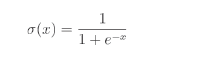

For the purpose of neural networks, we’ll use our common notation:

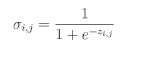

The denominator of the ​Sigmoid​ function contains ​e​ raised to the power of ​z​i,j,​ where ​z,​ given indices, means a singular output value of the layer that this activation function takes as input. The index ​i​ means the current sample, and the index ​j​ means the current output in this sample.

If we plot the sigmoid function:

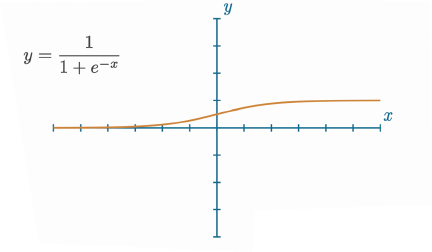
Figure 1:​ The sigmoid function graph.

Note the output from this function averages at ​0.5,​ and squishes down to a flat line as it approaches ​0​ or ​1​. The sigmoid function approaches both maximum and minimum values exponentially fast. For example, for an input of ​2,​ the output is ​~0.88​, which is already pretty close to ​1.​ With an input of ​3,​ the output is ​~0.95,​ and so on. It’s also similar for negative values: σ(-2) ≈ 0.12 and σ(-3) ≈ 0.05. This property makes the sigmoid activation function a good candidate to apply to the final layer’s output with a binary logistic regression model. For commonly-used functions, such as the sigmoid function, the derivatives are almost always public knowledge. Unless you’re inventing a function, you won’t need to calculate derivatives by hand, but it can still be a good exercise. The sigmoid function’s derivative solves to ​σi,j​ (1-σ ​ ​ )​ .​ If i,j you would like to leverage this fact without diving into the mathematical derivation, feel free to skip to the next section.

### Sigmoid Function Derivative 

Let’s define the derivative of the ​Sigmoid​ function with respect to its input:

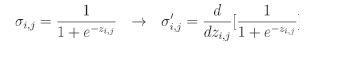

At this point, we might start calculating the derivative of the division operation, but, since the numerator contains just the value ​1,​ the whole fraction is effectively just a reciprocal of its denominator and can be represented as its negative power:

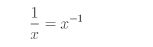

It’s easier to calculate the derivative of the power operation than the derivative of the division operation, so let’s update our equation to follow this:

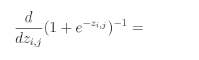

Now, we can calculate the derivative of the expression raised to the power of the ​-1,​ which equals this exponent multiplied by the expression itself, raised to the power lowered by ​1​. Then, following the chain rule, we have to calculate the derivative of the expression itself:

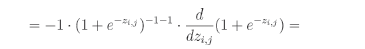

As we already learned, the derivative of the sum operation is the sum of derivatives:

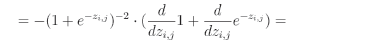

The derivative of ​1​ with respect to ​z​i,j​ equals ​0,​ as the derivative of a constant is always ​0.​ The derivative of the constant ​e​ raised to the power ​-zi,j​ ​ equals this value multiplied by the derivative of the exponent:

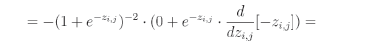

The derivative of the ​-zi,j​ ​ with respect to ​zi,j​ ​ equals ​-1​ as ​-1​ is a constant and can be moved outside of the derivative, leaving us with the derivative of ​z​i,j​ with respect to ​zi,j​ ​ which, as we know, equals 1:​
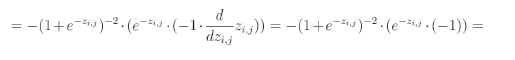


Now we can move the minus sign outside of the parentheses and cancel out the other minus:
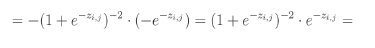

Let’s rewrite the resulting equation — the expression raised to the power of ​-2​ can be written as its reciprocal raised to the power of ​2,​ then the multiplier (the value we multiply by) from the equation can become the numerator of the resulting fraction:


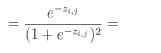

The denominator of this fraction can be written as the multiplication of the expression by itself instead of raising it to the power of ​2:​

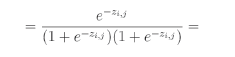

Now we can split this fraction into two separate ones — one containing ​1​ in the numerator and the other one ​e​ to the power of ​-z​i,j,​ both having each of the expressions that are separated by the multiplication operator in the denominator in their respective denominators. We can do this as we are performing the multiplication operation between both fractions:

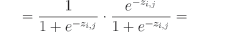
If you remember the equation of the sigmoid function, you might already see where we are going with this — the multiplicand (the value that is being multiplied by the multiplier) is the equation of the sigmoid function. Let’s work on this equation further — it’d be ideal if the numerator of the
multiplicator could be represented as some sort of equation containing the sigmoid function’s equation as well. What we can do is add ​1​ and remove ​1​ from it as it won’t change its value:

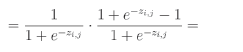

What this allows us to do is split the multiplicator into two separate fractions by the minus sign in the multiplicator:
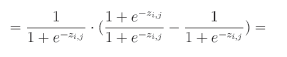

The minuend (the value we are subtracting from) of the multiplicator equals ​1​ as the numerator, and the denominator of the fraction are equal, and the subtrahend (the value we are subtracting from the minuend) is actually the equation of the sigmoid function as well:

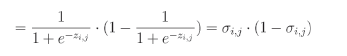

It turns out that the derivative of the sigmoid function equals this function multiplied by the difference of ​1​ and this function as well. That allows us to easily write this derivative in the code.

### Solution

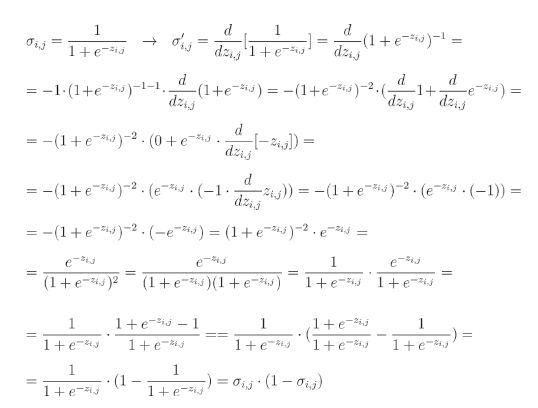

### Sigmoid Function Code 

As with other activation functions, we’ll write a forward pass method and a backward pass method. For the forward pass, we’ll take the inputs and apply the sigmoid function. For the backward pass, we’ll leverage the sigmoid function’s derivative, which, as we figured out during derivation of the sigmoid function’s derivative, equals the sigmoid output from the forward pass multiplied by the difference of 1 and this output.

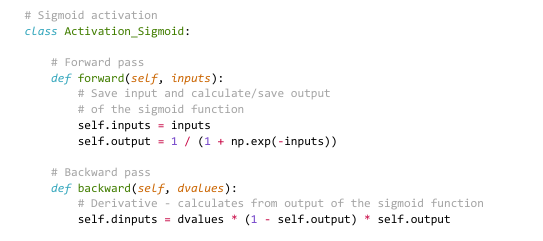

Now that we have the new activation function, we need to code our new calculation for the binary cross-entropy loss.





### Binary Cross-Entropy Loss 

To calculate binary cross-entropy loss, we will continue to use the negative log concept from categorical cross-entropy loss. Rather than only calculating this on the target class, we will sum the log-likelihoods of the correct and incorrect classes for each neuron separately. Because class values are either ​0​ or ​1​, we can simplify the incorrect class to be ​1-correct class​ as this inverts the value. We can then calculate the negative log-likelihood of the correct and incorrect classes, adding them together. We are presenting two forms of the equation — the first is following the description just given, then the optimized version differentiating only in the minus signs being moved over and redundant parentheses removed:

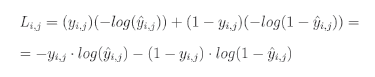

In code, this will start as (but will be modified shortly, so do not commit this to your codebase yet):

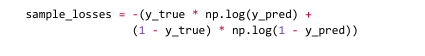

Since a model can contain multiple binary outputs, and each of them, unlike in the cross-entropy loss, outputs its own prediction, loss calculated on a single output is going to be a vector of losses containing one value for each output. What we need is a sample loss and, to achieve that, we need to calculate a mean of all of these losses from a single sample:

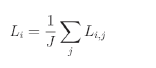

Where index ​i​ means the current sample, the index ​j​ means the current output in this sample, and the ​J​ means the number of outputs. Since we are operating on a set of samples (the output is an array containing the set of loss vectors), we can use NumPy to perform this operation on a single call:



The last parameter, ​axis​=-​1​, informs NumPy to calculate the mean value along the last dimension. To make it easier to visualize, let’s use a simple example. Assume that this is an output of the model containing 3 neurons in the output layer, and it’s passed through the binary cross-entropy loss function:
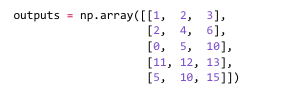

These numbers are completely made up for this example. We want to take each of the output vectors, ​[​1​, ​2​, ​3​] for example, and calculate a mean value from the numbers they hold, putting the result on the output vector. We then want to repeat this for the other vectors and return the resulting vector, which will be a one-dimensional array. Using NumPy:
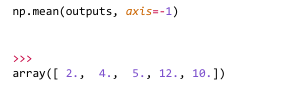
If we calculate the mean value of the first output, it’s indeed ​2,​ the mean value of the second output is indeed ​4,​ and so on. We are also going to inherit from the ​Loss​ class, so the overall loss calculation will be handled by the ​calculate​ method that we already created for the categorical cross-entropy loss class.

### Binary Cross-Entropy Loss Derivative 

To calculate the gradient from here, we already know that the derivative for the natural logarithm is ​1/x​ and that the derivative of ​1-x​ is ​-1.​ In simplified form, this gives us ​-(y_true / y + (1 - y_true) / (1 - y)) · (-1)​.

To calculate the partial derivative of this loss function with respect to the predicted input, we’ll use the latter version of the loss equation. It doesn’t really matter in this case which one we use:

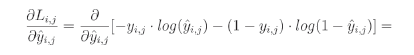


The expression that we have to calculate the partial derivative of consists of two sub-expressions, which are components of the sum operation. We can write that as the sum of derivatives:

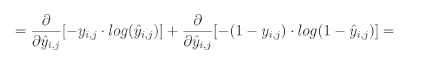
Both components contain ​yi,j​ ​ (the target value) inside of their derivatives, which are the constants that we are deriving with respect to ​y-hati,j​ ​ (the predicted value, which is a different variable), so we can move them outside of the derivative along with the other constants and minus sign:


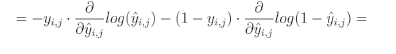

Now, like in the ​Categorical Cross-Entropy​ loss’ derivative, we have to calculate the derivative of the logarithmic function, which equals the reciprocal of its parameter multiplied (following the chain rule) by the derivative of this parameter. Let’s apply that to both of the partial derivatives:

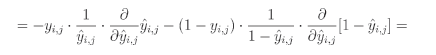

Now the first partial derivative equals ​1,​ since the value we derive, and the value we derive with respect to, are the same values. The second partial derivative can be written as the difference of the derivatives:

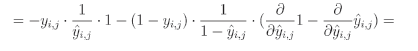
From the two new derivatives, the first one equals ​0​ as the derivative of the constant always equals ​0,​ then the second derivative equals ​1​ as the value we derive, and the value we derive with respect to, are the same values:
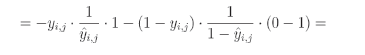

We can finally clean up to get the resulting equation:

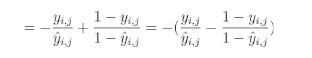

The partial derivative of the ​Binary Cross-Entropy​ loss solves to a pretty simple equation that will be easy to implement in code..

### Solution
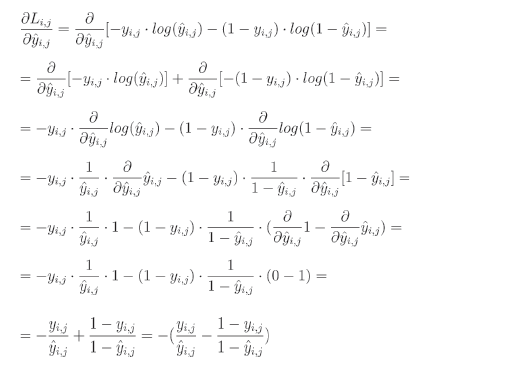
This partial derivative is a derivative of the single output’s loss and, with any type of output, we always need to calculate it with respect to a sample loss, not an atomic output loss, since we have to calculate the mean value of all output losses in a sample to form a ​sample loss​ during the forward pass:

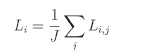

For backpropagation, we have to calculate the partial derivative of the ​sample loss​ with respect to each input:

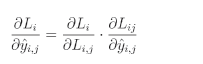

We have just calculated the second derivative, the partial derivative of the single output loss with respect to the related prediction. We have to calculate the partial derivative of the sample loss with respect to the single output loss:

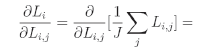

1​ divided by ​J​ (the number of outputs), is a constant and can be moved outside of the derivative. Since we are calculating the derivative with respect to a given output, ​j​, the sum of one element equals this element:
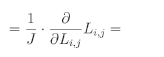

The remaining derivative equals ​1​ as the derivative of a variable with respect to the same variable equals ​1.​

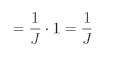

### Solution
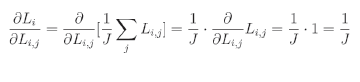
Now we can update the equation of the partial derivative of a sample loss with respect to a single output loss by applying the chain rule:

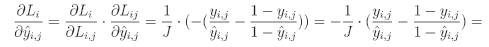
We have to perform this normalization since each output returns its own derivative, and without normalization, each additional input will raise gradients and require changing other hyperparameters, including the learning rate.





### Binary Cross-Entropy Code
In our code, this will be:
 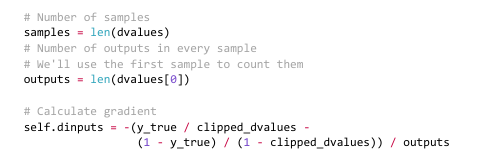
 
 
Similar to what we did in the categorical cross-entropy loss, we need to normalize gradient so it’ll become invariant to the number of samples we calculate it for:

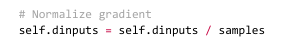

Finally, we need to address the numerical instability of the logarithmic function. The sigmoid activation can return a value in the range of ​0​ to ​1​ (inclusive), but the ​log(0)​ presents a slight issue due to how it’s calculated and will return ​negative infinity​. This alone isn’t necessarily a big deal, but any list with ​-inf​ in it will have a mean of ​-inf,​ which is the same for any list with positive infinity averaging to infinity.
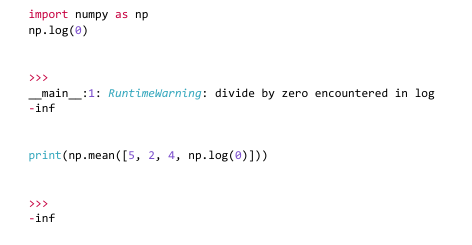
This is a similar issue to the one we discussed earlier regarding categorical cross-entropy loss in chapter 5. To prevent this issue, we’ll add clipping on the batch of values:
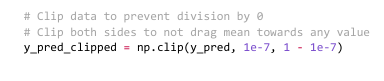

We now will use these clipped values for the forward pass, rather than the originals:

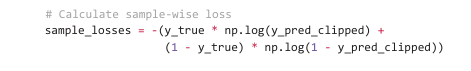

As we perform the division operation during the derivative calculation, the gradient passed in may contain both values, ​0 and ​1.​ Either of these values will cause a problem in either the y_true ​/ ​dvalues or ​(​1 ​- ​y_true) ​/ ​(​1 ​- ​dvalues) parts respectively (​0 in the first and ​1-1=0 in the second case will also cause division by ​0)​ , so we need to clip this gradient as well:
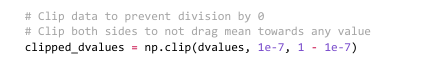


Now, similar to the forward pass, we can use these clipped values:

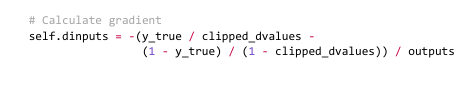

### Code
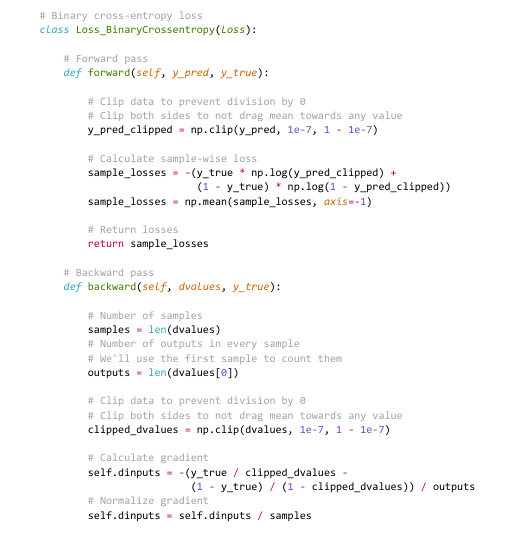
Now that we have this new activation function and loss calculation, we’ll make edits to our existing softmax classifier to implement the binary logistic regression model.

### Implementing Binary Logistic Regression and Binary Cross-Entropy Loss

With these new classes, our code changes will be in the execution of actual code (instead of modifying the classes). The first change is to make the ​spiral_data​ object output 2 classes, rather than 3, like so:
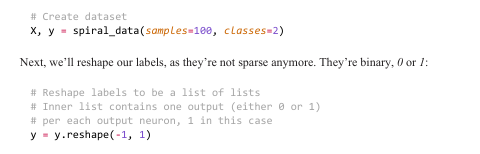

Consider the difference here. Initially, the ​y​ output from the ​spiral_data​ function would look something like:

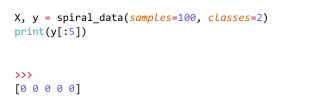
Then we reshape it here for binary logistic regression:

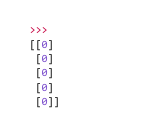

Why have we done this? Initially, with the softmax classifier, the values from ​spiral_data could be used directly as the target labels, as they contain the correct class labels in numerical form — an index of the correct class, where each neuron in the output layer is a separate class, for example ​[​0​, ​1​, ​1​, ​0​, ​1​]​. In this case, however, we’re trying to represent some binary outputs, where each neuron represents 2 possible classes on its own. For the example we’re currently working on, we have a single output neuron so the output from our neural network should be a tensor (array), containing one value, of a target value of either ​0​ or ​1​, for example, [[​0​], [​1​], [​1​], [​0​], [​1​]]​. The ​.reshape(​-​1​, ​1​)​ means to reshape the data into 2 dimensions, where the second dimension contains a single element, and the first dimension contains how many elements the result will contain (​-​1​) following other conditions. You are allowed to use ​-​1​ only once in a shape with NumPy, letting you have that dimension be variable. Thanks to this ability, we do not always need the same number of samples every time, and NumPy can handle the calculation for us. In the case above, they’re all ​0​ because the spiral_data​ function makes the dataset one class at a time, starting with ​0.​ We will also need to reshape the y-testing data in the same way. Let’s create our layers and use the appropriate activation functions:

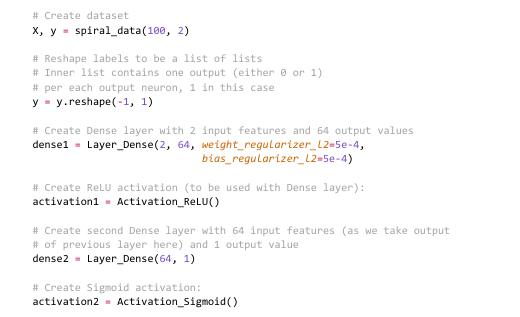
Notice that we’re still using the rectified linear activation for the hidden layer. The hidden layer activation functions don’t necessarily need to change, even though we’re effectively building a different type of classifier. You should also notice that because this is now a binary classifier, the dense2​ object has only 1 output. Its output represents exactly 2 classes (​0​ or ​1)​ being mapped to one neuron. We can now select a loss function and optimizer. For the ​Adam​ optimizer settings,
we are going to use the default learning rate and the decaying of ​5e-7​:
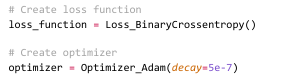

While we require a different calculation for loss (since we use a different activation function for the output layer), we can still use the same optimizer as in the softmax classifier. Another small change is how we measure predictions. With probability distributions, we use ​argmax and determine which index is associated with the largest value, which becomes the classification result. With a binary classifier, we are determining if the output is closer to ​0​ or to ​1.​ To do this, we simplify the output to:

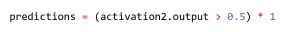

This results in ​True/​ ​False evaluations to the statement that the output is above ​05 for all values. True and ​False,​ when treated as numbers, are ​1 and ​0​, respectively. For example, if we execute: int(​ ​True​)​, the result will be ​1 and ​int​(​False​) will be ​0​. If we want to convert a list of True/False boolean values to numbers, we can’t just wrap the list in ​int( ​ )​. However, we ​can perform math operations directly on an array of boolean values and return the arithmetic answer. For example, we can run:

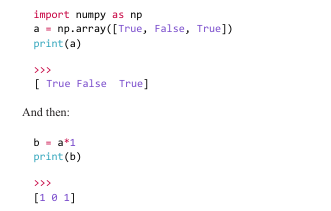

Thus, to evaluate predictive accuracy, we can do the following in our code:
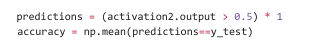
The ​* ​1​ multiplication turns an array of boolean True/False values into numerical 1/0 values, respectively. We will need to implement this accuracy calculation for validation data too.















In [1]:
import numpy as np

# Function to create spiral data (similar to nnfs)
def spiral_data(samples, classes):
    X = np.zeros((samples * classes, 2))  # Input features
    y = np.zeros(samples * classes, dtype='uint8')  # Class labels
    for class_number in range(classes):
        ix = range(samples * class_number, samples * (class_number + 1))
        r = np.linspace(0.0, 1, samples)  # Radius
        t = np.linspace(class_number * 4, (class_number + 1) * 4, samples) + np.random.randn(samples) * 0.2  # Theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_number
    return X, y


# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)


        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * \
                             self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * \
                            self.biases

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# Dropout
class Layer_Dropout:

    # Init
    def __init__(self, rate):
        # Store rate, we invert it as for example for dropout
        # of 0.1 we need success rate of 0.9
        self.rate = 1 - rate

    # Forward pass
    def forward(self, inputs):
        # Save input values
        self.inputs = inputs
        # Generate and save scaled mask
        self.binary_mask = np.random.binomial(1, self.rate,
                           size=inputs.shape) / self.rate
        # Apply mask to output values
        self.output = inputs * self.binary_mask

    # Backward pass
    def backward(self, dvalues):
        # Gradient on values
        self.dinputs = dvalues * self.binary_mask


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)

            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Sigmoid activation
class Activation_Sigmoid:

    # Forward pass
    def forward(self, inputs):
        # Save input and calculate/save output
        # of the sigmoid function
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    # Backward pass
    def backward(self, dvalues):
        # Derivative - calculates from output of the sigmoid function
        self.dinputs = dvalues * (1 - self.output) * self.output


# SGD optimizer
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))


    # Update parameters
    def update_params(self, layer):

        # If we use momentum
        if self.momentum:

            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                # If there is no momentum array for weights
                # The array doesn't exist for biases yet either.
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            weight_updates = \
                self.momentum * layer.weight_momentums - \
                self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # Build bias updates
            bias_updates = \
                self.momentum * layer.bias_momentums - \
                self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * \
                             layer.dweights
            bias_updates = -self.current_learning_rate * \
                           layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1



# Adagrad optimizer
class Optimizer_Adagrad:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1



# RMSprop optimizer
class Optimizer_RMSprop:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + \
            (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + \
            (1 - self.rho) * layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1



# Adam optimizer
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum  with current gradients
        layer.weight_momentums = self.beta_1 * \
                                 layer.weight_momentums + \
                                 (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * \
                               layer.bias_momentums + \
                               (1 - self.beta_1) * layer.dbiases
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + \
            (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + \
            (1 - self.beta_2) * layer.dbiases**2
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         weight_momentums_corrected / \
                         (np.sqrt(weight_cache_corrected) +
                             self.epsilon)
        layer.biases += -self.current_learning_rate * \
                         bias_momentums_corrected / \
                         (np.sqrt(bias_cache_corrected) +
                             self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Common loss class
class Loss:

    # Regularization loss calculation
    def regularization_loss(self, layer):

        # 0 by default
        regularization_loss = 0

        # L1 regularization - weights
        # calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * \
                                   np.sum(np.abs(layer.weights))

        # L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * \
                                   np.sum(layer.weights *
                                          layer.weights)

        # L1 regularization - biases
        # calculate only when factor greater than 0
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * \
                                   np.sum(np.abs(layer.biases))

        # L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * \
                                   np.sum(layer.biases *
                                          layer.biases)

        return regularization_loss

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)


        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Binary cross-entropy loss
class Loss_BinaryCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Calculate sample-wise loss
        sample_losses = -(y_true * np.log(y_pred_clipped) +
                          (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

        # Calculate gradient
        self.dinputs = -(y_true / clipped_dvalues -
                         (1 - y_true) / (1 - clipped_dvalues)) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples
# Create dataset
X, y = spiral_data(samples=100, classes=2)

# Reshape labels to be a list of lists
# Inner list contains one output (either 0 or 1)
# per each output neuron, 1 in this case
y = y.reshape(-1, 1)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4,
                            bias_regularizer_l2=5e-4)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 1 output value
dense2 = Layer_Dense(64, 1)

# Create Sigmoid activation:
activation2 = Activation_Sigmoid()

# Create loss function
loss_function = Loss_BinaryCrossentropy()

# Create optimizer
optimizer = Optimizer_Adam(decay=5e-7)

# Train in loop
for epoch in range(10001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function
    # of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through activation function
    # takes the output of second dense layer here
    activation2.forward(dense2.output)

    # Calculate the data loss
    data_loss = loss_function.calculate(activation2.output, y)
    # Calculate regularization penalty
    regularization_loss = \
        loss_function.regularization_loss(dense1) + \
        loss_function.regularization_loss(dense2)

    # Calculate overall loss
    loss = data_loss + regularization_loss

    # Calculate accuracy from output of activation2 and targets
    # Part in the brackets returns a binary mask - array consisting
    # of True/False values, multiplying it by 1 changes it into array
    # of 1s and 0s
    predictions = (activation2.output > 0.5) * 1
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, '+
              f'loss: {loss:.3f} (' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}), ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_function.backward(activation2.output, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Validate the model

# Create test dataset
X_test, y_test = spiral_data(samples=100, classes=2)

# Reshape labels to be a list of lists
# Inner list contains one output (either 0 or 1)
# per each output neuron, 1 in this case
y_test = y_test.reshape(-1, 1)


# Perform a forward pass of our testing data through this layer
dense1.forward(X_test)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# takes the output of second dense layer here
activation2.forward(dense2.output)

# Calculate the data loss
loss = loss_function.calculate(activation2.output, y_test)

# Calculate accuracy from output of activation2 and targets
# Part in the brackets returns a binary mask - array consisting of
# True/False values, multiplying it by 1 changes it into array
# of 1s and 0s
predictions = (activation2.output > 0.5) * 1
accuracy = np.mean(predictions==y_test)

print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')



epoch: 0, acc: 0.425, loss: 0.693 (data_loss: 0.693, reg_loss: 0.000), lr: 0.001
epoch: 100, acc: 0.710, loss: 0.580 (data_loss: 0.579, reg_loss: 0.001), lr: 0.0009999505024501287
epoch: 200, acc: 0.710, loss: 0.432 (data_loss: 0.429, reg_loss: 0.003), lr: 0.0009999005098992651
epoch: 300, acc: 0.735, loss: 0.383 (data_loss: 0.378, reg_loss: 0.005), lr: 0.000999850522346909
epoch: 400, acc: 0.765, loss: 0.354 (data_loss: 0.347, reg_loss: 0.006), lr: 0.0009998005397923115
epoch: 500, acc: 0.830, loss: 0.325 (data_loss: 0.318, reg_loss: 0.008), lr: 0.0009997505622347225
epoch: 600, acc: 0.865, loss: 0.299 (data_loss: 0.290, reg_loss: 0.009), lr: 0.0009997005896733929
epoch: 700, acc: 0.885, loss: 0.275 (data_loss: 0.265, reg_loss: 0.010), lr: 0.0009996506221075735
epoch: 800, acc: 0.905, loss: 0.255 (data_loss: 0.243, reg_loss: 0.011), lr: 0.000999600659536515
epoch: 900, acc: 0.910, loss: 0.238 (data_loss: 0.226, reg_loss: 0.013), lr: 0.0009995507019594694
epoch: 1000, acc: 0.920, loss:

epoch: 8300, acc: 0.990, loss: 0.055 (data_loss: 0.036, reg_loss: 0.019), lr: 0.000995867647197952
epoch: 8400, acc: 0.990, loss: 0.055 (data_loss: 0.036, reg_loss: 0.019), lr: 0.0009958180620484277
epoch: 8500, acc: 0.995, loss: 0.054 (data_loss: 0.036, reg_loss: 0.019), lr: 0.0009957684818364362
epoch: 8600, acc: 0.995, loss: 0.054 (data_loss: 0.035, reg_loss: 0.019), lr: 0.0009957189065612402
epoch: 8700, acc: 0.995, loss: 0.053 (data_loss: 0.035, reg_loss: 0.018), lr: 0.000995669336222102
epoch: 8800, acc: 0.995, loss: 0.053 (data_loss: 0.035, reg_loss: 0.018), lr: 0.000995619770818285
epoch: 8900, acc: 0.995, loss: 0.052 (data_loss: 0.034, reg_loss: 0.018), lr: 0.0009955702103490519
epoch: 9000, acc: 0.995, loss: 0.052 (data_loss: 0.034, reg_loss: 0.018), lr: 0.000995520654813666
epoch: 9100, acc: 0.995, loss: 0.052 (data_loss: 0.034, reg_loss: 0.018), lr: 0.0009954711042113903
epoch: 9200, acc: 0.995, loss: 0.051 (data_loss: 0.034, reg_loss: 0.018), lr: 0.0009954215585414883
epoc